In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def compute_on_grid(grid, delta, func, func_params):
    #compute normalization constant C
    C = 0
    f_ts = []
    for t in grid:
        f_t = func(t, func_params)
        C += f_t*delta
        f_ts.append(f_t)
        
    #compute first moment
    moment1 = 0
    for i,t  in enumerate(grid):
        f_t = f_ts[i]
        p_t = f_t/C
        moment1 += t*p_t*delta
    
    #compute other moment
    moment2 = 0
    moment4 = 0
    for i,t  in enumerate(grid):
        f_t = f_ts[i]        
        p_t = f_t/C
        moment2 += ((t-moment1)**2)*p_t*delta
        moment4 += ((t-moment1)**4)*p_t*delta
    
    max_f = grid[np.argmax(f_ts)]
    return C, moment1, moment2, moment4, max_f

### Gaussian Distribution 

In [4]:
mu = 3
sigma = 10
bound = [mu-3*sigma, mu+3*sigma]
delta = 0.1
grid = np.arange(bound[0],bound[1],delta)
C_true = (1/(np.sqrt(2*np.pi)*sigma))
print 1/C_true

def unnormalized_gaussian(tetha, params):
    mu = params[0]
    sigma = params[1]
    return np.exp(-(0.5*(tetha-mu)**2)/(sigma**2))


compute_on_grid(grid, delta, unnormalized_gaussian, [mu,sigma])

25.06628274631


(24.998603340387884,
 2.9986668459369232,
 97.33355678134328,
 26800.33156711905,
 3.0000000000004263)

### Gamma Distribution

In [5]:
from scipy.special import gamma

def unnormalized_gamma(tetha, params):
    alpha = params[0]
    beta = params[1]
    return (tetha**(alpha-1))*np.exp(-1*beta*tetha)

In [6]:
alpha = 1
beta = 20
C_true = (beta**alpha)/gamma(alpha)
print 1/C_true

#true moments
moment1_gamma_true = 1.0*alpha/(beta)
moment2_gamma_true = np.sqrt(1.0*alpha/((beta)**2))
max_gamma_true = (1.0*(alpha-1))/beta
print moment1_gamma_true
print moment2_gamma_true
print max_gamma_true
bound_gamma = [0, moment1_gamma_true + 10*moment2_gamma_true]
delta_gamma = 0.0001
grid_gamma = np.arange(bound_gamma[0], bound_gamma[1], delta_gamma)

compute_on_grid(grid_gamma, delta_gamma, unnormalized_gamma, [alpha,beta])

0.05
0.05
0.05
0.0


(0.05004918074626274,
 0.04994083057780755,
 0.002494946733410728,
 5.464576338521143e-05,
 0.0)

### Student Distribution 

In [7]:
def student_distribution(tetha, params):
    d = params[0]
    mu = params[1]
    sigma = params[2]
    return (1 + ((tetha-mu)**2)/(d*sigma*sigma))**(-0.5*(d+1))

(17.0769552539719,
 2.996465848361892,
 29.065943895712596,
 1641.4291745172254,
 2.999999999999787)

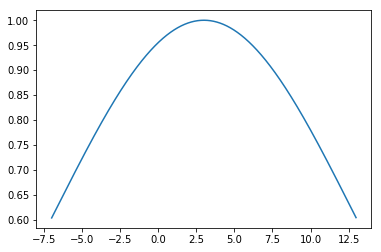

In [9]:
d = 50
mu = 3
sigma = 10
bound_student = [mu-1*sigma, mu+1*sigma]
delta_student = 0.01
grid_student = np.arange(bound_student[0],bound_student[1], delta_student)
plt.plot(grid_student, student_distribution(grid_student, [d,mu,sigma]))
compute_on_grid(grid_student, delta_student, student_distribution, [d,mu,sigma])

### Section 2

In [247]:
def gamma_normal(tetha,params):
    mu = tetha[0]
    beta = tetha[1]
    a = params[0]
    b = params[1]
    lamda = params[2]
    mu0 = params[3]
    C = (b**a)*np.sqrt(lamda)/(gamma(a)*np.sqrt(2*np.pi))
    return C*(beta**(a-0.5))*np.exp(-b*beta - 0.5*lamda*beta*(mu-mu0)**2)

In [265]:
def compute_posterior(X, a=0.0001, b=0.0001, lamda=0.0001, mu0=0):
    x_mean = np.mean(X)
    s = np.var(X)

    n = len(X)
    a_new = a + 0.5*n
    b_new = b + 0.5*(n*s + lamda*n*((x_mean-mu0)**2)/(lamda+n))
    lamda_new = lamda+n
    mu_new = (lamda*mu0 + np.sum(X))/lamda_new
    return a_new, b_new, lamda_new, mu_new

In [266]:
def compute_bound(a,b,lamda,mu0):
    beta_mean = a/b
    beta_var = a/(b**2)
    beta_sigma = np.sqrt(beta_var)
    
    sigma = np.sqrt((1/(lamda*beta_mean)))
    bound_mu = [mu0-3*sigma, mu0 + 3*sigma]
    bound_beta = [beta_mean - 3*beta_sigma, beta_mean + 3*beta_sigma]
    return bound_mu, bound_beta

In [267]:
def compute_on_grid(grid, delta, func, func_params):
    #compute normalization constant C
    C = 0
    f_ts = []
    for t in grid:
        f_t = func(t, func_params)
        C += f_t*delta
        f_ts.append(f_t)
        
    #compute first moment
    moment1 = 0
    for i,t  in enumerate(grid):
        f_t = f_ts[i]
        p_t = f_t/C
        moment1 += t*p_t*delta
    
    #compute other moment
    moment2 = 0
    moment4 = 0
    for i,t  in enumerate(grid):
        f_t = f_ts[i]        
        p_t = f_t/C
        moment2 += ((t-moment1)**2)*p_t*delta
        moment4 += ((t-moment1)**4)*p_t*delta
    
    max_f = grid[np.argmax(f_ts)]
    return C, moment1, moment2, moment4, max_f

In [271]:
mu_true = 3.0
beta_true = 0.1
X = np.random.normal(mu_true, np.sqrt(1/beta_true), size=200)

a,b,lamda,mu = compute_posterior(X)
n = len(X)
print a,b,lamda,mu
print a/b

#compute the true normalization constant 
C_true = (gamma(a)/((b**a)*np.sqrt(lamda)))/((gamma(0.0001)/((0.0001**0.0001)*np.sqrt(0.0001)))/((2*np.pi)**(n/2)))
true_mean = [mu,a/b]
true_variance = [b/(lamda*(a-1)), a/(b**2)]
print true_mean
print true_variance

100.0001 790.3575694111257 200.0001 3.0455901564713597
0.12652513731791978
[3.0455901564713597, 0.12652513731791978]
[0.03991698868145277, 0.00016008594364724094]


In [269]:
#computing grid
bound_mu, bound_beta = compute_bound(a,b,lamda,mu)
delta_mu = 0.05
delta_beta = 0.01
mu_vals = np.arange(bound_mu[0], bound_mu[1], delta_mu)
beta_vals = np.arange(bound_beta[0], bound_beta[1], delta_beta)
M = np.meshgrid(mu_vals, beta_vals, indexing='ij')
grid = np.vstack([M[0].ravel(), M[1].ravel()]).T
delta = delta_mu*delta_beta

In [270]:
compute_on_grid(grid,delta,gamma_normal, [a,b,lamda,mu])

(0.9966139614028482,
 array([2.99332222, 0.10285212]),
 array([0.04785171, 0.00010446]),
 array([6.54201718e-03, 3.20118293e-08]),
 array([2.9822167 , 0.10201218]))

In [250]:
print C

0.9901053315476055
